# Multi-label URL Classification


In [1]:
from utils import (
    get_data,
    get_urls_parsed,
    get_labels,
    get_data_splitted,
    convert_text_to_sequences,
    save_tokenizer,
    save_labelbinarizer,
    save_loss_plt,
    save_acc_plt
)
from config.config import (
    DATA_TYPE,
    MAX_LEN,
    RANDOM_STATE,
    TEST_SIZE,
    TRAINED_MODEL_OUTPUT_PATH,
    EPOCHS,
    BATCH_SIZE,
    VALIDATION_SPLIT,
    TOKENIZER_OUTPUT_PATH,
    LABELBINARIZER_OUTPUT_PATH,
    MODEL_NAME,
    PLT_IMAGES_PATH
)
from model import train_model, evaluate_model, get_jaccard_score
import argparse

In [2]:
# Path by default
# Change it if necessary
DATA_PATH = "./data"

# Get the data
df = get_data(data_path=DATA_PATH, data_type=DATA_TYPE)

# Get the parsed url
all_url_parsed = get_urls_parsed(df=df)

# Binarize the labels with MultiLabelBinarizer
mlb, all_binary_labels = get_labels(df)

Data preprocessing...


100%|██████████████████████████████████| 67595/67595 [00:02<00:00, 24435.96it/s]


In [3]:
# Get data splitted
train_data, test_data, y_train, y_test = get_data_splitted(all_url_parsed,
                                                           all_binary_labels,
                                                           random_state=RANDOM_STATE,
                                                           test_size=TEST_SIZE)

# Get the text vectors
X_train, X_test, vocab_size, tokenizer = convert_text_to_sequences(all_text_url=all_url_parsed,
                                                                   max_len=MAX_LEN,                                                
                                                                   sentences_train=train_data,                                                 
                                                                   sentences_test=test_data)

In [4]:
history = train_model(x=X_train,                        
                      y=y_train,                         
                      epochs=EPOCHS,                         
                      batch_size=BATCH_SIZE,                         
                      validation_split=VALIDATION_SPLIT,                         
                      vocab_size=vocab_size,
                      max_len=MAX_LEN,                         
                      trained_model_output_path=TRAINED_MODEL_OUTPUT_PATH,                        
                      model_name=MODEL_NAME)

2021-07-23 12:42:47.381954: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 20)           1400700   
_________________________________________________________________
dropout (Dropout)            (None, 120, 20)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 118, 300)          18300     
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1903)              572803    
_________________________________________________________________
activation (Activation)      (None, 1903)              0         
Total params: 1,991,803
Trainable params: 1,991,803
Non-trainable params: 0
______________________________________________

2021-07-23 12:42:47.805552: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
1521/1521 [==============================] - 87s 47ms/step - loss: 0.0767 - acc: 0.0055 - val_loss: 0.0128 - val_acc: 0.0740
Epoch 2/8
1521/1521 [==============================] - 70s 46ms/step - loss: 0.0117 - acc: 0.0729 - val_loss: 0.0104 - val_acc: 0.0923
Epoch 3/8
1521/1521 [==============================] - 70s 46ms/step - loss: 0.0098 - acc: 0.1048 - val_loss: 0.0096 - val_acc: 0.1311
Epoch 4/8
1521/1521 [==============================] - 71s 46ms/step - loss: 0.0088 - acc: 0.1244 - val_loss: 0.0091 - val_acc: 0.1335
Epoch 5/8
1521/1521 [==============================] - 71s 47ms/step - loss: 0.0081 - acc: 0.1404 - val_loss: 0.0088 - val_acc: 0.1341
Epoch 6/8
1521/1521 [==============================] - 70s 46ms/step - loss: 0.0075 - acc: 0.1498 - val_loss: 0.0088 - val_acc: 0.1416
Epoch 7/8
1521/1521 [==============================] - 71s 46ms/step - loss: 0.0071 - acc: 0.1546 - val_loss: 0.0087 - val_acc: 0.1431
Epoch 8/8
1521/1521 [==============================] - 

In [5]:
# Save the tokenizer
save_tokenizer(tokenizer=tokenizer,
               tokenizer_output_path=TOKENIZER_OUTPUT_PATH)

In [6]:
# Save MultiLabelBinarizer
save_labelbinarizer(mlb=mlb,
                    labelbinarizer_output_path=LABELBINARIZER_OUTPUT_PATH)

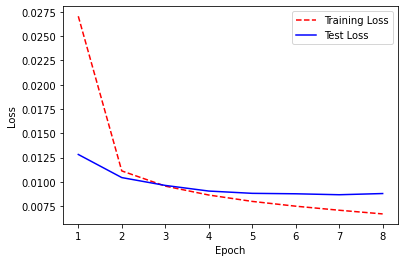

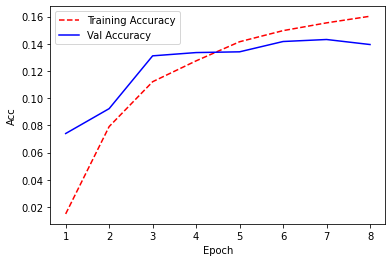

In [7]:
# Save plt images
save_loss_plt(history=history, plt_images_path=PLT_IMAGES_PATH)
save_acc_plt(history=history, plt_images_path=PLT_IMAGES_PATH)

In [8]:
# Test the model (metrics : acc)
results = evaluate_model(history=history, x_test=X_test, y_test=y_test)

212/212 [==============================] - 3s 14ms/step - loss: 0.0087 - acc: 0.1369
Testing on data...

Test loss : 0.00869440846145153
Test acc : 0.13691841065883636


In [9]:
# Get Jaccard score
jaccard_score = get_jaccard_score(history=history, x_test=X_test, y_test=y_test)

Jaccard score : 0.3354710849602403
